In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [2]:
#General parameters
dt = 15
time = 261
initial_capital = 1000


#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "constant_timesteps"
#mode = "constant_gain"


#Swing tade parameters
trades = 20
max_trades = 125
hold_time = 20
time_after_reversel = 0
smooth_period = 3

trade_coast = 1
spread = 0.002


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_capital=initial_capital, dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread)

performance, phase = sim.simulate_performance()

random_swing_performance_analyse, trade_dates_random  = sim.random_swing_trade_ana(set='simulation')
swing_performance_analyse, trade_dates = sim.swing_trade_ana(set='simulation')

sim.print_parameters()
sim.print_results()


Simulation parameters: 

Yearly return:  1.07
Daily return:  1.000648281389141
Daily loss:  0.9993521386073425
Gain phase:  0.7
Loss phase:  0.30000000000000004


Swing trade parameters: 

Max trades:  125
Trades:  20
Hold time:  20
Time after reversel:  0
Trade coast:  1
Spread:  0.002


Buy and hold return:  1073.8902985673692
Random swing trade return analyse:  943.0864577854574
Swing trade return analyse:  1054.39775075331
Best return:  1128.107297297187


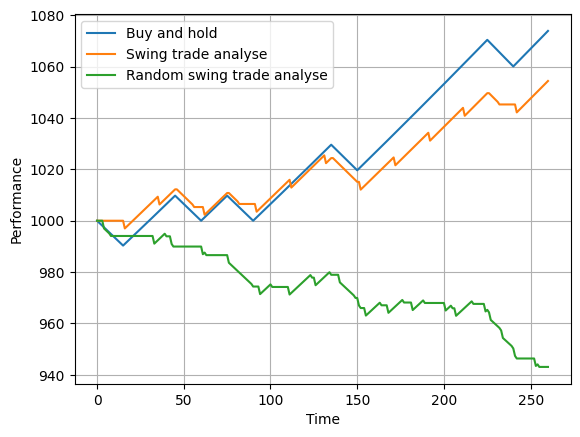

In [3]:
plt.plot(performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade analyse")
plt.plot(random_swing_performance_analyse, label="Random swing trade analyse")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

#plt.yscale("log")

plt.show()

In [4]:
mc = MonteCarloSimulation(chartsim=sim)
_ = mc.mc_artificial_chart(n=2500)

100%|██████████| 2500/2500 [00:30<00:00, 82.55it/s]


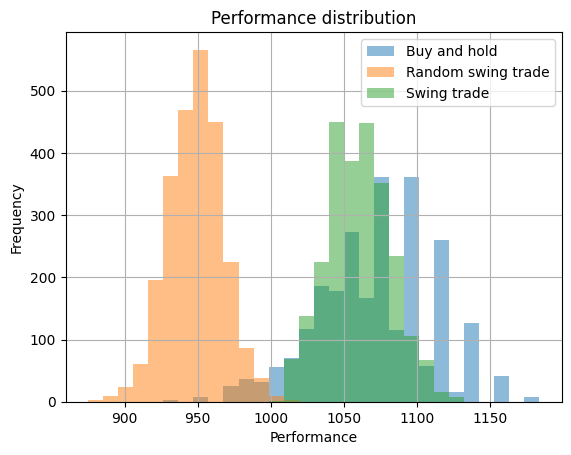

Parameters of ChartSimulation:

Simulation parameters: 

Yearly return:  1.07
Daily return:  1.000648281389141
Daily loss:  0.9993521386073425
Gain phase:  0.7
Loss phase:  0.30000000000000004


Swing trade parameters: 

Max trades:  125
Trades:  20
Hold time:  20
Time after reversel:  0
Trade coast:  1
Spread:  0.002




Buy and hold return: 1071.225 +/- 39.842
Random swing trade return: 948.863 +/- 18.685
Swing trade return: 1059.756 +/- 21.869


In [5]:
mc.hist_performance(bins=30)
mc.print_results(accuracy=3)